# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [73]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [105]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
import numpy as np
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 9.0.1**: List three different real networks and state the nodes and links for each of them.

>> **Ex. 9.01: Answer**
1. Travel by air:
  + *Nodes*: Airports 
  + *Links*: Airplanes (specifically routes, I guess) 
2. Principle-agent models:
  + *Nodes*: Principle and/or agent(s)
  + *Links*: Choice of action for principle and/or agent(s)
3. Disease simulation in [World of Warcraft](https://www.sciencedirect.com/science/article/abs/pii/S1473309907702128):
  + *Nodes*: Individual players
  + *Links*: Being in close enough vicinity to spread disease in-game (and originally pets). 

> **Ex. 9.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

>> **Ex. 9.0.2: Answer** \
Seeing as I found this [article](https://www.sciencedirect.com/science/article/abs/pii/S1473309907702128) quite interesting, and given that it allowed for new approaches in epidemic predictions, I find the principles behind such a network quite interesting: 
  + Given that this would be a social network, individual players account for each node. Links would be persons whom the disease has been spread to. The event is a good example of how rapidly contagion happens, when accounting for human behavior. 
  + Hard to determine explicitly, but 4 million players were affected according to the article. 
  + Definitely, but it would require for the event to be anticipated. 
  + Was an interesting example given the global situation. In particular, how individual action with good intents, such as keeping players with a lower power level alive, may have extended the duration of the pandemic.  

> **Ex. 9.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

>> Seeing as the corona-crisis is ongoing, I think network science could (and probably should) have a major impact on the study of epidemics. The book also highlights this area in relation to the 2009 H1N1 pandemic. 

> **Ex. 9.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

>> A network is considered sparse, when the amount of links is significantly smaller than the amount of possible links. This would apply to nearly all social networks, as they have an $L_{max}$ equivalent to the entire world population (in principle). 

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 9.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

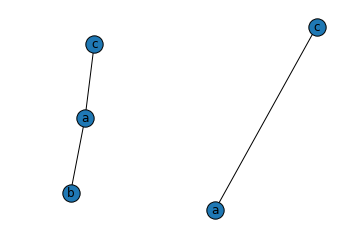

In [75]:
G = nx.Graph()

G.add_nodes_from(['a','b','c'])
G.add_edges_from([('a','b'),('a','c')])

plt.subplot(1,2,1)
nx.draw(G, with_labels = True)

G.remove_node('b')

plt.subplot(1,2,2)
nx.draw(G, with_labels = True)

> **Ex. 9.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

>> **Ex. 9.1.2: Answer** \
An Erdős–Rényi (ER) network is a $G_{n,p}$ network with $n$ nodes that are connected with some probability $p$. From the `NetworkX` documentation, this is also referred to as a binomial graph. We generate one by using the function `gnp_random_graph(n, p)`. As specified, we generate one with $n=100$ and $p=0.1$. 



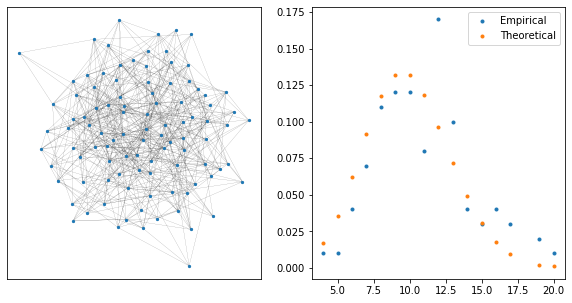

In [212]:
from collections import Counter
from scipy.special import comb

erdos_renyi = nx.gnp_random_graph(100, 0.1)

def compute_degree_distribution(network, p):
    N = network.number_of_nodes()
    degrees = sorted([d for n, d in network.degree()])
    counts = Counter(degrees)
    degrees, counts = zip(*counts.items())
    empirical_probs = [c/N for c in counts]
    theoretical_probs = [comb(N-1, k ) * (p**k) * (1-p) ** (N - 1 - k) for k in degrees]
    return degrees, empirical_probs, theoretical_probs

degr, probs, ther = compute_degree_distribution(erdos_renyi, 0.1)

# Plotting the network
pos = nx.spring_layout(erdos_renyi)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
nx.draw_networkx_nodes(erdos_renyi, pos, node_size = 5, with_labels = False, ax = ax[0])
nx.draw_networkx_edges(erdos_renyi, pos, alpha = 0.9, width = 0.1, ax = ax[0])

# Plotting the distribution
ax[1].plot(degr, probs, '.', label = 'Empirical')
ax[1].plot(degr, ther, '.', label = 'Theoretical')
ax[1].legend(frameon = True, fontsize = 10)

plt.show()

> **Ex. 9.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

>> **Ex. 9.1.3: Answer** 
The Barabási-Albert (BA) network is more akin to how a network would be in the 'real' world. Particularly, this means that the network accounts for *preferential attachment*. In essence, this means that nodes are more likely to connect to nodes that are well-connected. In [the book](http://networksciencebook.com/chapter/5#growth) the example used is that of Google. Also, *growth* is introduced, rather than simply having a static $n$. We generate the network with the function `barabasi_albert_graph(n, m)`.

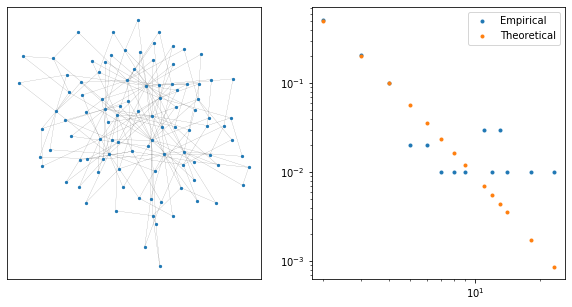

In [116]:
barabasi_albert = nx.barabasi_albert_graph(100, 2)

def compute_degree_distribution(network, m):
    N = network.number_of_nodes()
    degrees = sorted([d for n, d in network.degree()])
    counts = Counter(degrees)
    degrees, counts = zip(*counts.items())
    empirical_probs = [c/N for c in counts]
    theoretical_probs = [(2*m*(m+1))/(k*(k+1)*(k+2)) for k in degrees]
    return degrees, empirical_probs, theoretical_probs

degr, probs, ther = compute_degree_distribution(barabasi_albert, 2)

# Plotting the network
pos = nx.spring_layout(barabasi_albert)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
nx.draw_networkx_nodes(barabasi_albert, pos, node_size = 5, with_labels = False, ax = ax[0])
nx.draw_networkx_edges(barabasi_albert, pos, alpha = 0.9, width = 0.1, ax = ax[0])

# Plotting the distribution
ax[1].plot(degr, probs, '.', label = 'Empirical')
ax[1].plot(degr, ther, '.', label = 'Theoretical')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend(frameon = True, fontsize = 10)

plt.show()

>> The BA model sequentially connects nodes, depending on the amount of nodes already connected. That is, if a node is generated and two existing nodes exist then the most probable outcome is that the newly generated node connects to the existing node with most links, as described in [the book](http://networksciencebook.com/chapter/5#degree-distribution-5-5). This is different to the ER network, as this applies an equal probability of linking to another node. Therefore, the BA network appears to have a higher mass of links at the center. This seems somewhat intuitive, when considering how the BA network is generated.  

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [121]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [133]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 9.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [195]:
from datetime import datetime as dt

def create_slice(data, t0, t1):
    if isinstance(t0, str):
        t0 = dt.timestamp(dt.fromisoformat(t0))
    if isinstance(t1, str):
        t1 = dt.timestamp(dt.fromisoformat(t1))
        
    slice = data.loc[data.timestamp.between(t0, t1)]
    slice = slice.groupby(['user1', 'user2']).size().reset_index(name='weight')

    return nx.from_pandas_edgelist(slice, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

t0 = data.timestamp.min()
t1 = data.timestamp.max()   

DG = create_slice(data, t0, t1)

print('Nodes: %d\nEdges: %d ' % (len(DG.nodes), len(DG.edges)))

Nodes: 46952
Edges: 274086 


> **Ex: 9.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

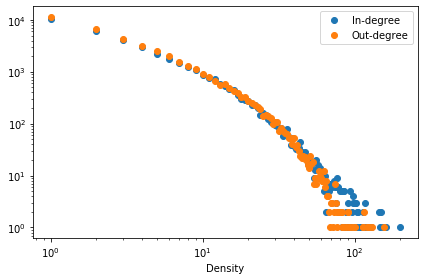

In [155]:
def degree_distribution(degrees):
    degrees = sorted([d for n, d in degrees])
    counts = Counter(degrees)
    degrees, counts = zip(*counts.items())
    return degrees, counts

degin, cntin = degree_distribution(DG.in_degree())
degout, cntout = degree_distribution(DG.out_degree())

plt.plot(degin, cntin, 'o', label = 'In-degree')
plt.plot(degout, cntout, 'o', label = 'Out-degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.xlabel('Density')
plt.legend(frameon = True, fontsize = 10)
plt.tight_layout()
plt.show()

> **Ex: 9.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

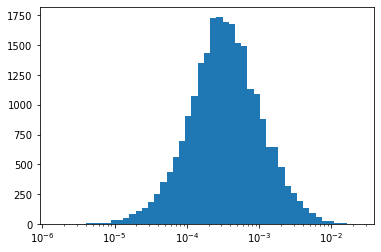

In [158]:
clustering = nx.clustering(DG, weight = 'weight')

_min = sorted(set(clustering.values()))[1]
_max = sorted(set(clustering.values()))[-1]

bins = np.logspace(np.log10(_min), np.log10(_max), 50)
plt.hist(clustering.values(), bins = bins)
plt.xscale('log')
plt.show()

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 9.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

>> Usain Bolt broke the world record in 100m sprint on 2008-05-31. That was pretty cool. So lets check out our network around that time:

In [211]:
DG_new = create_slice(data, '2008-05-20', '2008-05-31')

print('Nodes: %d\nEdges: %d ' % (len(DG_new.nodes), len(DG_new.edges)))

Nodes: 6050
Edges: 7156 


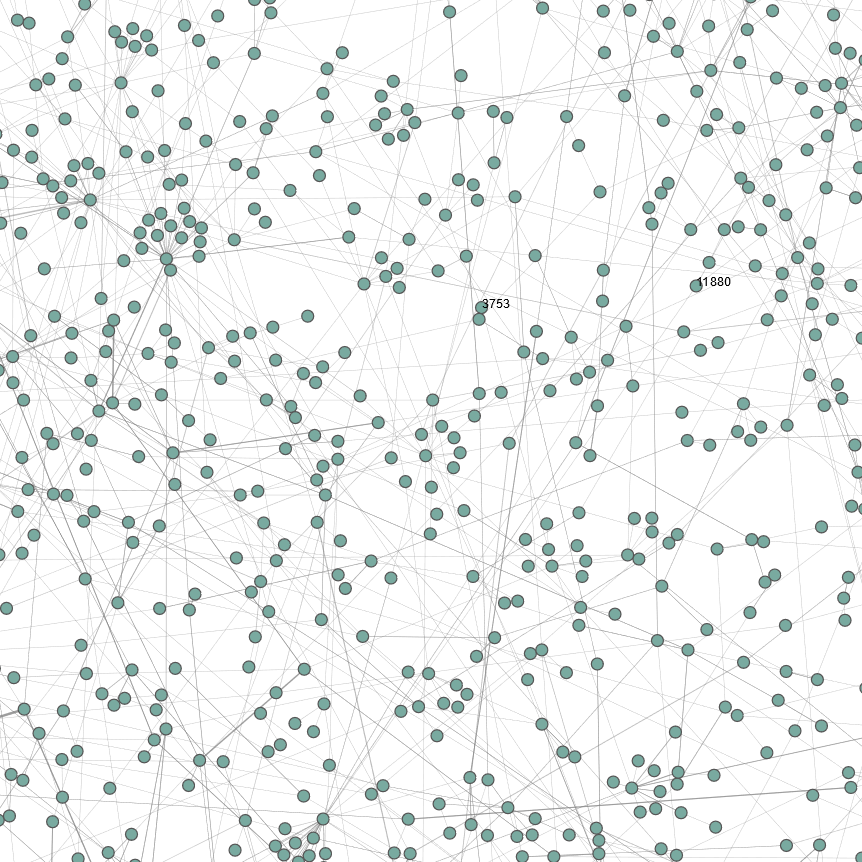

>> As we can see, the network does not appear very meaningful. 